<a href="https://colab.research.google.com/github/elhamshaerirahbar-bot/my-colab-project/blob/main/Untitled8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy pandas tensorflow

In [ ]:
!pip install scikit-learn

In [ ]:
import numpy as np, pandas as pd, re, unicodedata
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers, callbacks
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
import pandas as pd, re, unicodedata
from difflib import get_close_matches

WANTED = ['factor A','factor B','factor C','factor D','Response 1 (Mn)']

def norm(s: str) -> str:
    s = unicodedata.normalize("NFKC", str(s))
    s = s.replace("\ufeff","").replace("\u00a0"," ")
    s = re.sub(r"\s+"," ", s).strip()
    return s.lower()

df = pd.read_csv('Python.csv', sep=';', encoding='utf-8-sig')


name_map = {norm(c): c for c in df.columns}

def map_col(wanted: str):
    k = norm(wanted)
    if k in name_map:
        return name_map[k]

    cand = get_close_matches(k, list(name_map.keys()), n=1, cutoff=0.7)
    return name_map[cand[0]] if cand else None

mapped = [(w, map_col(w)) for w in WANTED]
missing = [w for w,c in mapped if c is None]
cols    = [c for _,c in mapped if c is not None]

print(f"Missing: {missing}")

n = 5
view = df[cols].head(n)
try:
    display(view)
except NameError:
    print(view.to_string(index=False))

Missing: []


,factor A,factor B,factor C,factor D,Response 1 (Mn)
0,110,7,50,10,1127.19
1,85,4,50,30,1127.20
2,101,1,500,60,1127.21
3,79,1,219,10,1127.22
4,50,1,500,20,1127.23


In [ ]:
# ---- pick columns via your map_col (no warnings) ----
FEATURES = [map_col('factor A'), map_col('factor B'),
            map_col('factor C'), map_col('factor D')]
TARGET   = map_col('Response 1 (Mn)')

X = df[FEATURES].astype(float).to_numpy()      # (n,4)
y = df[[TARGET]].astype(float).to_numpy()      # (n,1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, shuffle=True, random_state=55
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.20, shuffle=True, random_state=55
)

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=SEED
)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
x_scaler = StandardScaler().fit(X_train)
X_train_z = x_scaler.transform(X_train)
X_val_z   = x_scaler.transform(X_val)
X_test_z  = x_scaler.transform(X_test)

y_scaler  = MinMaxScaler(feature_range=(-1, 1)).fit(y_train)
y_train_s = y_scaler.transform(y_train)
y_val_s   = y_scaler.transform(y_val)
y_test_s  = y_scaler.transform(y_test)

def inv_y(y_s):
    return y_scaler.inverse_transform(y_s)

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))  # لایه اول
model.add(Dropout(0.2))   # 👈 Dropout بعد از هر لایه Dense
model.add(Dense(1,  activation='tanh'))  # خروجی

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=55)

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(
    X_train_z, y_train_s,
    validation_data=(X_val_z, y_val_s),
    epochs=500, batch_size=16, callbacks=[early_stop], verbose=1
)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 417ms/step - loss: 0.5731 - mae: 0.6195 - val_loss: 0.2339 - val_mae: 0.3471
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.4709 - mae: 0.5552 - val_loss: 0.2306 - val_mae: 0.3410
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - loss: 0.6284 - mae: 0.6481 - val_loss: 0.2287 - val_mae: 0.3356
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - loss: 0.6743 - mae: 0.6937 - val_loss: 0.2271 - val_mae: 0.3319
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - loss: 0.5091 - mae: 0.6042 - val_loss: 0.2255 - val_mae: 0.3276
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - loss: 0.4422 - mae: 0.5478 - val_loss: 0.2241 - val_mae: 0.3221
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 426ms/step - loss: 0.4737 - mae: 0.5788 - val_loss: 0.2228 - val_mae: 0.3166
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - loss: 0.4977 - mae: 0.5462 - val_loss: 0.2219 - val_mae: 0.3124
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - loss: 0.442

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_hat_train = inv_y(model.predict(X_train_z, verbose=1))
y_hat_val   = inv_y(model.predict(X_val_z,   verbose=1))
y_hat_test  = inv_y(model.predict(X_test_z,  verbose=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def report(name, yt, yp):
    mse = mean_squared_error(yt, yp)
    mae = mean_absolute_error(yt, yp)
    r2  = r2_score(yt, yp)
    print(f"[{name}] MSE={mse:.6f}  MAE={mae:.6f}  R²={r2:.4f}")

print("\n== Performance (real units) ==")
report("Train", y_train, y_hat_train)
report("Val  ", y_val,   y_hat_val)
report("Test ", y_test,  y_hat_test)


== Performance (real units) ==
[Train] MSE=0.004872  MAE=0.058823  R²=0.0273
[Val  ] MSE=0.002734  MAE=0.032738  R²=0.0655
[Test ] MSE=0.002997  MAE=0.050315  R²=0.4958


In [ ]:
import numpy as np, pandas as pd

def make_table(split, y_true, y_pred, n=None):
    y_true = np.asarray(y_true).reshape(-1)
    y_pred = np.asarray(y_pred).reshape(-1)
    tbl = pd.DataFrame({
        "split":     split,
        "actual":    y_true,
        "predicted": y_pred,
    })
    tbl["residual"]  = tbl["actual"] - tbl["predicted"]
    tbl["abs_error"] = tbl["residual"].abs()
    tbl["pct_error"] = 100 * tbl["abs_error"] / np.maximum(1e-8, np.abs(tbl["actual"]))
    return tbl if n is None else tbl.head(n)

tbl_train = make_table("Train", y_train, y_hat_train)
tbl_val   = make_table("Val",   y_val,   y_hat_val)
tbl_test  = make_table("Test",  y_test,  y_hat_test)

tbl_all = pd.concat([tbl_train, tbl_val, tbl_test], ignore_index=True)
print(tbl_all.to_string(index=False))         # یا display(tbl_all) در نوت‌بوک

split  actual   predicted  residual  abs_error  pct_error
Train 1127.28 1127.326538 -0.046538   0.046538   0.004128
Train 1127.32 1127.330688 -0.010688   0.010688   0.000948
Train 1127.20 1127.295776 -0.095776   0.095776   0.008497
Train 1127.41 1127.306763  0.103237   0.103237   0.009157
Train 1127.24 1127.289429 -0.049429   0.049429   0.004385
Train 1127.21 1127.305786 -0.095786   0.095786   0.008498
Train 1127.31 1127.335205 -0.025205   0.025205   0.002236
Train 1127.34 1127.305786  0.034214   0.034214   0.003035
Train 1127.22 1127.295776 -0.075776   0.075776   0.006722
Train 1127.23 1127.374268 -0.144268   0.144268   0.012798
Train 1127.39 1127.296631  0.093369   0.093369   0.008282
Train 1127.36 1127.326294  0.033706   0.033706   0.002990
Train 1127.40 1127.326538  0.073462   0.073462   0.006516
Train 1127.37 1127.311768  0.058232   0.058232   0.005165
Train 1127.43 1127.326904  0.103096   0.103096   0.009144
Train 1127.26 1127.324097 -0.064097   0.064097   0.005686
Train 1127.29 

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

def diag(name, y_true, y_pred):
    var = np.var(y_true, ddof=0)
    mse = mean_squared_error(y_true, y_pred)
    mse_mean = mean_squared_error(y_true, np.full_like(y_true, y_true.mean()))
    r2  = r2_score(y_true, y_pred)
    print(f"{name}: n={len(y_true)}  Var(y)={var:.6f}  MSE(model)={mse:.6f}  MSE(mean)={mse_mean:.6f}  R²={r2:.4f}")

diag("Train", y_train, y_hat_train)
diag("Val  ", y_val,   y_hat_val)
diag("Test ", y_test,  y_hat_test)

Train: n=20  Var(y)=0.005009  MSE(model)=0.004872  MSE(mean)=0.005009  R²=0.0273
Val  : n=4  Var(y)=0.002925  MSE(model)=0.002734  MSE(mean)=0.002925  R²=0.0655
Test : n=5  Var(y)=0.005944  MSE(model)=0.002997  MSE(mean)=0.005944  R²=0.4958


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold, cross_val_score
import numpy as np

rkf = RepeatedKFold(n_splits=5, n_repeats=20, random_state=42)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=1.0))
])

scores = cross_val_score(pipe, X, y.ravel(), cv=rkf, scoring="r2")
print("Baseline Ridge  R²: mean=%.3f  std=%.3f" % (scores.mean(), scores.std()))

Baseline Ridge  R²: mean=-1.314  std=2.614


In [ ]:
# ---- 0) Reproducibility / Determinism ----
import os, random, numpy as np, tensorflow as tf

SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)
try:
    tf.keras.utils.set_random_seed(SEED)
    tf.config.experimental.enable_op_determinism(True)
except Exception:
    pass

In [ ]:
# ---- 5) Activation (Transfer Function) sweep on hidden layers ----
import random, numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers, optimizers

activations = ['relu', 'tanh', 'sigmoid', 'softplus']
labels      = ['ReLU', 'Tanh', 'Sigmoid', 'Softplus']

val_mse_real  = []
test_mse_real = []

In [ ]:
for act in activations:

    tf.keras.backend.clear_session()
    np.random.seed(SEED); random.seed(SEED); tf.random.set_seed(SEED)

    model = tf.keras.Sequential([
        layers.Input(shape=(X_train_z.shape[1],)),
        layers.Dense(16, activation=act),
        layers.Dense(1,  activation='tanh')
    ])
    model.compile(optimizer=optimizers.Adam(learning_rate=1e-3), loss='mse')


    history = model.fit(
        X_train_z, y_train_s,
        validation_data=(X_val_z, y_val_s),
        epochs=200, batch_size=16, shuffle=True, verbose=1,
        callbacks=[]
    )

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - loss: 0.6411 - val_loss: 0.1833
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.6328 - val_loss: 0.1837
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.6257 - val_loss: 0.1838
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.6187 - val_loss: 0.1839
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.6118 - val_loss: 0.1840
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.6050 - val_loss: 0.1842
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.5982 - val_loss: 0.1849
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.5915 - val_loss: 0.1856
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.5847 - val_loss: 0.1863
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.5779 - val_loss: 0.1870
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.5712 - val_loss: 0.1876
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.5644 - val_l

In [ ]:
y_val_pred_real  = inv_y(model.predict(X_val_z,  verbose=0))
y_test_pred_real = inv_y(model.predict(X_test_z, verbose=0))

val_mse_real.append(mean_squared_error(y_val,  y_val_pred_real))
test_mse_real.append(mean_squared_error(y_test, y_test_pred_real))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


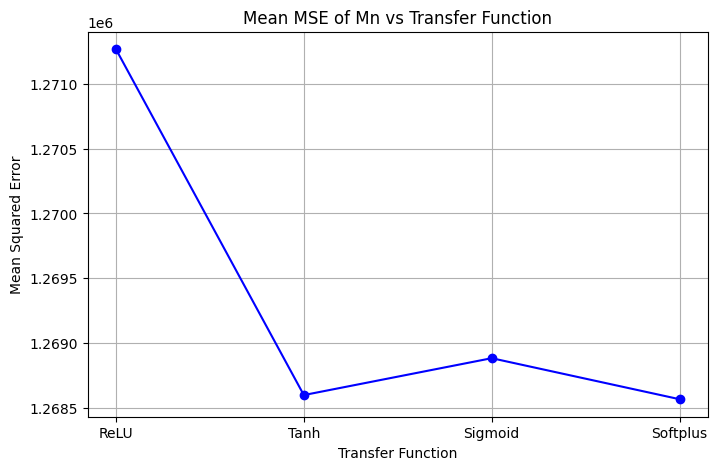

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

transfer_functions = {
    'relu': 'ReLU',
    'tanh': 'Tanh',
    'sigmoid': 'Sigmoid',
    'softplus': 'Softplus'
}

mse_results = []

for activation, name in transfer_functions.items():
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(16, activation=activation))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='tanh'))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, batch_size=4, epochs=50, verbose=0)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_results.append(mse)

# حالا که mse_results پر شده، رسم کن:
plt.figure(figsize=(8, 5))
plt.plot(list(transfer_functions.values()), mse_results, marker='o', linestyle='-', color='blue')
plt.title('Mean MSE of Mn vs Transfer Function')
plt.xlabel('Transfer Function')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

In [ ]:
y = y.ravel()

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_predict

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])

cv = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(pipe, X, y, cv=cv)

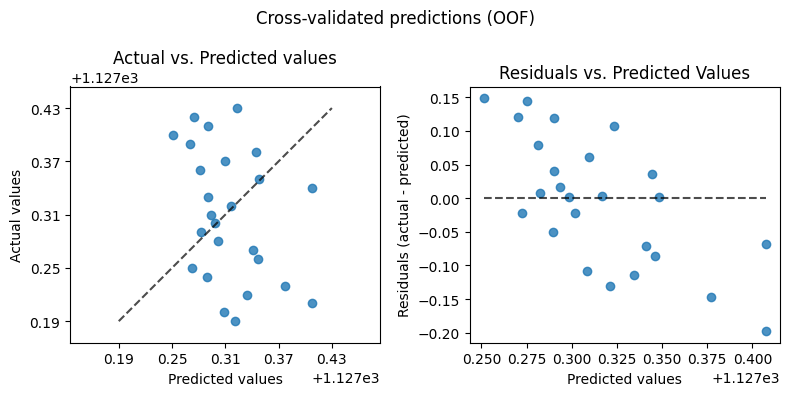

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))

# نمودار Actual vs Predicted
PredictionErrorDisplay.from_predictions(
    y_true=y,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=None,          # ← تغییر نسبت به 25
    ax=axs[0],
    random_state=42,
)
axs[0].set_title("Actual vs. Predicted values")

# نمودار Residual vs Predicted
PredictionErrorDisplay.from_predictions(
    y_true=y,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=None,          # ← تغییر نسبت به 25
    ax=axs[1],
    random_state=42,
)
axs[1].set_title("Residuals vs. Predicted Values")

fig.suptitle("Cross-validated predictions (OOF)")
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import (
    r2_score, mean_absolute_percentage_error, mean_squared_error,
    mean_squared_log_error, explained_variance_score, max_error,
    median_absolute_error
)

In [ ]:
df = pd.read_csv("Python.csv", engine="python", sep=r";")
df.columns = (df.columns
              .str.replace('\ufeff', '', regex=False)   # حذف BOM
              .str.strip()
              .str.replace(r'\s+', ' ', regex=True))    # یکی‌کردن فاصله‌ها

print("ستون‌های موجود:", list(df.columns))  # کمک برای چک کردن

# 2) نگاشتِ نام‌ها به‌صورت Case-Insensitive (بی‌حساسیت به بزرگی/کوچکی حروف)
def pick_cols(df, names):
    lookup = {c.casefold(): c for c in df.columns}
    missing = [n for n in names if n.casefold() not in lookup]
    if missing:
        raise KeyError(f"ستون‌های پیدا نشدند: {missing}\nموجود: {list(df.columns)}")
    return [lookup[n.casefold()] for n in names]

FEATURES_REQ = ['factor A', 'factor B', 'factor C', 'factor D']
TARGETS_REQ  = ['Response 1 (Mn)', 'Response 2 (Mw)']

FEATURES = pick_cols(df, FEATURES_REQ)
TARGETS  = pick_cols(df, TARGETS_REQ)

ستون‌های موجود: ['factor A', 'factor B', 'factor C', 'factor D', 'Response 1 (Mn)', 'Response 2 (Mw)']


In [ ]:
X = df[FEATURES].to_numpy(dtype=float)
Y = df[TARGETS].to_numpy(dtype=float)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, shuffle=True
)

X_trval, X_test, Y_trval, Y_test = train_test_split(
    X, Y, test_size=5, random_state=42, shuffle=True
)

n_samples = X.shape[0]

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_trval.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Total: {n_samples} samples\n")

Training set: 20 samples
Validation set: 20 samples
Test set: 5 samples
Total: 25 samples



In [ ]:
for col in FEATURES + TARGETS:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.').str.strip(),
                            errors='coerce')

# 4) ساخت X و Y
X = df[FEATURES].to_numpy(dtype=float)
Y = df[TARGETS].to_numpy(dtype=float)

print("X shape:", X.shape, "Y shape:", Y.shape)
n_samples = X.shape[0]

X shape: (25, 4) Y shape: (25, 2)


In [ ]:
base_svr = make_pipeline(StandardScaler(),SVR(kernel='poly', C=1 , epsilon= 0.1, gamma='scale')
)
model = MultiOutputRegressor(base_svr)
model.fit(X_train, Y_train)

MultiOutputRegressor(estimator=Pipeline(steps=[('standardscaler',
                                                StandardScaler()),
                                               ('svr',
                                                SVR(C=1, kernel='poly'))]))

In [ ]:
model.fit(X_train, Y_train)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
Y_pred = model.predict(X_test)
print("Test predictions shape:", Y_pred.shape)
def overall_metrics(y_true, y_pred):
    r2   = r2_score(y_true, y_pred, multioutput='uniform_average')
    evs  = explained_variance_score(y_true, y_pred, multioutput='uniform_average')
    mape = mean_absolute_percentage_error(y_true, y_pred, multioutput='uniform_average')
    mse  = mean_squared_error(y_true, y_pred, multioutput='uniform_average')
    try:
        msle = mean_squared_log_error(y_true, y_pred, multioutput='uniform_average')
    except ValueError:
        msle = np.nan
    # Median AE را دستی روی هر خروجی بگیریم و میانگین کنیم
    mae_med = np.mean([median_absolute_error(y_true[:,i], y_pred[:,i]) for i in range(y_true.shape[1])])
    # Max Error را روی کل عناصر محاسبه کنیم
    maxerr = np.max(np.abs(y_true - y_pred))
    return evs, maxerr, mape, mse, msle, mae_med, r2
evs, maxerr, mape, mse, msle, mae_med, r2 = overall_metrics(Y_test, Y_pred)
print("SVM Results:")
print(f"Explained Variance: {evs:.6f}")
print(f"Max Error: {maxerr:.6f}")
print(f"MAPE: {mape:.6f}")
print(f"MSE: {mse:.6f}")
print(f"MSLE: {msle:.6f}")
print(f"Median AE: {mae_med:.6f}")
print(f"R²: {r2:.6f}\n")

Test predictions shape: (5, 2)
SVM Results:
Explained Variance: 0.371681
Max Error: 0.093440
MAPE: 0.000045
MSE: 0.003752
MSLE: 0.000000
Median AE: 0.050647
R²: 0.368801



In [ ]:
test_df = pd.DataFrame({
    "Actual_Mn":     Y_test[:,0],
    "Actual_Mw":     Y_test[:,1],
    "Predicted_Mn":  Y_pred[:,0],
    "Predicted_Mw":  Y_pred[:,1],
})
print("Actual vs Predicted Comparison (Test):")
print(test_df.to_string(index=False))
print()

Actual vs Predicted Comparison (Test):
 Actual_Mn  Actual_Mw  Predicted_Mn  Predicted_Mw
   1127.27    1321.73   1127.320647   1321.780647
   1127.35    1321.81   1127.317766   1321.777766
   1127.19    1321.65   1127.268218   1321.728218
   1127.42    1321.88   1127.326560   1321.786560
   1127.30    1321.76   1127.317493   1321.777493



In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_list, mse_list, mape_list = [], [], []

for tr_idx, va_idx in kf.split(X):
    X_tr, X_va = X[tr_idx], X[va_idx]
    Y_tr, Y_va = Y[tr_idx], Y[va_idx]
    m = MultiOutputRegressor(make_pipeline(StandardScaler(), SVR(kernel='poly', C=1, epsilon=0.1, gamma='scale')))
    m.fit(X_tr, Y_tr)
    Y_va_pred = m.predict(X_va)
    r2_list.append(r2_score(Y_va, Y_va_pred, multioutput='uniform_average'))
    mse_list.append(mean_squared_error(Y_va, Y_va_pred, multioutput='uniform_average'))
    mape_list.append(mean_absolute_percentage_error(Y_va, Y_va_pred, multioutput='uniform_average'))

r2_arr   = np.array(r2_list)
mse_arr  = np.array(mse_list)
mape_arr = np.array(mape_list)

print("\n5-FOLD CROSS VALIDATION RESULTS")
print("============================================================")
print(f"R² Mean: {r2_arr.mean():.4f} (±{r2_arr.std():.4f})")
print(f"MSE Mean: {mse_arr.mean():.4f} (±{mse_arr.std():.4f})")
print(f"MAPE Mean: {mape_arr.mean():.4f} (±{mape_arr.std():.4f})\n")

print("Individual R² scores:", np.array2string(r2_arr, precision=4))
print("Individual MSE scores:", np.array2string(mse_arr, precision=4))
print("Individual MAPE scores:", np.array2string(mape_arr, precision=4))




5-FOLD CROSS VALIDATION RESULTS
R² Mean: -2.4861 (±4.4807)
MSE Mean: 0.0052 (±0.0020)
MAPE Mean: 0.0001 (±0.0000)

Individual R² scores: [  0.3688  -0.2553  -1.2842 -11.3763   0.1165]
Individual MSE scores: [0.0038 0.0065 0.0063 0.0074 0.002 ]
Individual MAPE scores: [4.4712e-05 5.6870e-05 5.1566e-05 6.7652e-05 3.0318e-05]


In [ ]:
model_all = MultiOutputRegressor(make_pipeline(StandardScaler(), SVR(kernel='rbf', C=10.0, epsilon=0.01, gamma='scale')))
model_all.fit(X, Y)
Y_all_pred = model_all.predict(X)

all_df = pd.DataFrame({
    "Sample": np.arange(1, n_samples+1),
    "Actual_Mn": Y[:,0],
    "Actual_Mw": Y[:,1],
    "Predicted_Mn": Y_all_pred[:,0],
    "Predicted_Mw": Y_all_pred[:,1],
})
all_df["Error_Mn"] = (all_df["Actual_Mn"] - all_df["Predicted_Mn"]).abs()
all_df["Error_Mw"] = (all_df["Actual_Mw"] - all_df["Predicted_Mw"]).abs()

print("\nActual vs Predicted Comparison (All samples):")
for i, row in all_df.iterrows():
    a_mn, a_mw = row["Actual_Mn"], row["Actual_Mw"]
    p_mn, p_mw = row["Predicted_Mn"], row["Predicted_Mw"]
    print(f"Sample {int(row['Sample']):2d}: Actual=[ {a_mn:7.2f}, {a_mw:7.2f} ] | Predicted=[ {p_mn:7.2f}, {p_mw:7.2f} ]")

print("\nDetailed Comparison Table:")
print(all_df.to_string(index=False))
# ==== end ====


Actual vs Predicted Comparison (All samples):
Sample  1: Actual=[ 1127.19, 1321.65 ] | Predicted=[ 1127.20, 1321.66 ]
Sample  2: Actual=[ 1127.20, 1321.66 ] | Predicted=[ 1127.21, 1321.67 ]
Sample  3: Actual=[ 1127.21, 1321.67 ] | Predicted=[ 1127.33, 1321.79 ]
Sample  4: Actual=[ 1127.22, 1321.68 ] | Predicted=[ 1127.23, 1321.69 ]
Sample  5: Actual=[ 1127.23, 1321.69 ] | Predicted=[ 1127.30, 1321.76 ]
Sample  6: Actual=[ 1127.24, 1321.70 ] | Predicted=[ 1127.31, 1321.77 ]
Sample  7: Actual=[ 1127.25, 1321.71 ] | Predicted=[ 1127.26, 1321.72 ]
Sample  8: Actual=[ 1127.26, 1321.72 ] | Predicted=[ 1127.27, 1321.73 ]
Sample  9: Actual=[ 1127.27, 1321.73 ] | Predicted=[ 1127.28, 1321.74 ]
Sample 10: Actual=[ 1127.28, 1321.74 ] | Predicted=[ 1127.29, 1321.75 ]
Sample 11: Actual=[ 1127.29, 1321.75 ] | Predicted=[ 1127.28, 1321.74 ]
Sample 12: Actual=[ 1127.30, 1321.76 ] | Predicted=[ 1127.31, 1321.77 ]
Sample 13: Actual=[ 1127.31, 1321.77 ] | Predicted=[ 1127.32, 1321.78 ]
Sample 14: Actual

In [ ]:
g = GridSearchCV(base, param_grid, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
model = MultiOutputRegressor(g)
model.fit(X, Y)
for i, t in enumerate(TARGETS):
    best = model.estimators_[i].best_params_
    print(f"Best params for {t}: {best}")

Best params for Response 1 (Mn): {'svr__C': 1, 'svr__epsilon': 0.1, 'svr__gamma': 'scale', 'svr__kernel': 'poly'}
Best params for Response 2 (Mw): {'svr__C': 1, 'svr__epsilon': 0.1, 'svr__gamma': 'scale', 'svr__kernel': 'poly'}
